In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 데이터셋 준비

In [271]:
train = pd.read_csv("./aiffel-ds-3-credit-card-fraud-detection/train.csv") 
test = pd.read_csv("./aiffel-ds-3-credit-card-fraud-detection/test.csv")
submission = pd.read_csv("./aiffel-ds-3-credit-card-fraud-detection/sample_submission.csv")

# 데이터 이해 및 탐색

train
* 컬럼 기본 정보
 * id : 고유 숫자 부여
 * Time : 각 거래와 데이터셋의 첫 거래 사이의 경과 시간(초)
 * V1 ~ V28 : PCA로 얻은 주성분
 * Amount : 거래 금액
 * Class : 응답 변수(사기 거래인 경우 1, 그렇지 않은 경우 0) -> "Target" 데이터!

In [273]:
train.shape

(170883, 32)

In [274]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [275]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [276]:
test.shape # 아 이거네. 이것과 train 의 id가 같은것을 걸렀다.

(113923, 31)

In [277]:
submission.shape # 이건 샘플 결과 파일이니까....

(113923, 2)

In [278]:
submission.head(5)

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0


In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# 스케일링 및 인코딩

In [281]:
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train.drop('Class', axis=1)), columns=train.columns[:-1])
## class 빼고 처음부터 마지막 -1 컬럼까지

In [282]:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170878,170878,120394.0,2.085243,0.153914,-1.937797,0.455977,0.457744,-1.599438,0.828357,-0.606184,...,0.146098,0.674611,-0.092485,0.116184,0.578814,-0.074287,-0.049963,-0.071206,13.12,0
170879,170879,120395.0,1.941601,-0.105717,-2.025099,0.021689,1.257679,1.180161,-0.212451,0.406611,...,-0.275532,-0.651069,0.353144,-1.058401,-0.454839,0.282256,-0.022103,-0.058297,1.98,0
170880,170880,120395.0,-0.184060,1.192288,-0.831053,-0.379134,0.898165,-0.494622,0.780753,-0.873814,...,0.755613,-0.315061,0.223707,0.640872,-1.259095,0.179031,0.105884,0.271658,17.60,0
170881,170881,120395.0,1.418125,-1.676690,-0.942455,0.734790,-0.915707,0.286333,-0.420231,0.070484,...,-0.078157,-0.408628,0.023694,0.628874,-0.337955,-0.753715,-0.002207,0.020888,327.60,0


In [283]:
train_scaled

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.732041,-2.195325,-0.643044,-0.070491,1.477195,0.918960,-0.121185,0.312058,0.265009,0.054146,...,0.303736,0.013419,0.541845,-0.150594,0.096734,0.077916,-0.411116,0.335413,-0.076462,0.253232
1,-1.732020,-2.195325,0.735843,0.139912,-0.236081,0.241070,0.176392,-0.108558,0.001544,0.043070,...,-0.137820,-0.265545,-0.831582,0.211697,-0.582629,0.160903,0.230897,-0.028260,0.039957,-0.344157
2,-1.732000,-2.195289,-0.642259,-0.857260,0.925491,0.191231,-0.244356,1.345254,0.721654,0.175500,...,0.680638,0.371495,1.281887,1.594273,-1.166228,-0.902057,-0.309175,-0.146565,-0.202388,1.184464
3,-1.731980,-2.195289,-0.430383,-0.140295,0.939793,-0.714860,0.123855,0.918038,0.263363,0.281200,...,-0.329262,-0.107587,0.133397,-0.287200,-1.978399,1.192486,-0.477994,0.154687,0.192027,0.147033
4,-1.731960,-2.195253,-0.534116,0.519574,0.763196,0.208181,-0.172636,0.029099,0.557386,-0.246622,...,0.520219,0.025354,1.321746,-0.196760,0.220889,-0.640765,0.998024,0.554481,0.692152,-0.070528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170878,1.731960,2.131033,1.218618,0.070237,-1.757351,0.246772,0.473512,-1.279939,0.752184,-0.520037,...,-0.334659,0.234480,1.136425,-0.119818,0.178998,1.045200,-0.177088,-0.132813,-0.239661,-0.301751
170879,1.731980,2.131068,1.140995,-0.090937,-1.820466,-0.069786,1.071101,0.866272,-0.109045,0.304966,...,-0.410149,-0.332448,-0.850160,0.642584,-1.782703,-1.175302,0.549574,-0.061732,-0.197653,-0.347044
170880,1.732000,2.131068,-0.007685,0.714842,-0.957240,-0.361951,0.802527,-0.426878,0.712794,-0.738043,...,-0.527279,1.054038,-0.346638,0.421138,1.055290,-2.903014,0.339194,0.264805,0.876017,-0.283536
170881,1.732020,2.131068,0.858116,-1.066170,-1.037777,0.450003,-0.552519,0.176121,-0.280975,0.031163,...,-0.077232,-0.067056,-0.486851,0.078947,1.035252,-0.924211,-1.561814,-0.010972,0.060013,0.976864


In [284]:
train_scaled.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.708830e+05,1.708830e+05,1.708830e+05,170883.000000,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,...,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05,1.708830e+05
mean,-7.451254e-17,-1.490251e-16,2.128930e-17,0.000000,-6.386789e-17,2.661162e-17,6.652905e-17,1.064465e-17,9.314067e-18,-5.322324e-18,...,7.318196e-18,-1.463639e-17,5.056208e-17,8.648777e-18,1.097729e-17,-3.459511e-17,6.652905e-19,6.237099e-18,-1.663226e-19,1.034527e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.732041e+00,-2.195325e+00,-3.039014e+01,-45.165984,-2.470583e+01,-4.108974e+00,-3.135488e+01,-2.024427e+01,-3.597522e+01,-5.966714e+01,...,-3.150798e+01,-4.679517e+01,-1.625826e+01,-7.662070e+01,-4.752558e+00,-2.231488e+01,-5.333959e+00,-5.757817e+01,-3.811515e+01,-3.550941e-01
25%,-8.660203e-01,-7.142104e-01,-4.414044e-01,-0.360020,-4.032449e-01,-6.275239e-01,-4.875725e-01,-5.786062e-01,-4.184025e-01,-1.587337e-01,...,-2.955705e-01,-2.721958e-01,-6.938733e-01,-2.529369e-01,-5.702915e-01,-6.191191e-01,-6.989551e-01,-1.714972e-01,-9.598901e-02,-3.328135e-01
50%,0.000000e+00,-1.133990e-02,-7.415357e-03,0.042777,9.421083e-02,5.013220e-03,-3.744652e-02,-2.014244e-01,4.032751e-02,1.990533e-02,...,-9.246139e-02,-3.519585e-02,2.541295e-02,-2.354294e-02,8.428561e-02,9.321724e-02,-1.458622e-01,1.683704e-02,6.087334e-02,-2.660936e-01
75%,8.660203e-01,6.299560e-01,7.318384e-01,0.473937,5.814733e-01,5.978564e-01,4.112836e-01,3.018754e-01,4.495473e-01,2.596619e-01,...,1.719757e-01,2.105975e-01,6.697115e-01,2.072814e-01,6.794939e-01,6.599055e-01,5.305838e-01,2.235828e-01,2.468383e-01,-4.316546e-02
max,1.732041e+00,2.131104e+00,1.409896e+00,13.667750,6.426608e+00,1.221506e+01,2.613002e+01,1.735058e+01,3.041581e+01,1.627122e+01,...,5.426869e+01,3.661519e+01,1.586480e+01,3.254951e+01,6.703634e+00,1.595544e+01,7.142934e+00,3.099963e+01,1.101326e+02,7.956454e+01


# 피쳐엔지니어링

In [286]:
print(train['Amount'].min())
print(train['Amount'].max())

0.0
19656.53


In [287]:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170878,170878,120394.0,2.085243,0.153914,-1.937797,0.455977,0.457744,-1.599438,0.828357,-0.606184,...,0.146098,0.674611,-0.092485,0.116184,0.578814,-0.074287,-0.049963,-0.071206,13.12,0
170879,170879,120395.0,1.941601,-0.105717,-2.025099,0.021689,1.257679,1.180161,-0.212451,0.406611,...,-0.275532,-0.651069,0.353144,-1.058401,-0.454839,0.282256,-0.022103,-0.058297,1.98,0
170880,170880,120395.0,-0.184060,1.192288,-0.831053,-0.379134,0.898165,-0.494622,0.780753,-0.873814,...,0.755613,-0.315061,0.223707,0.640872,-1.259095,0.179031,0.105884,0.271658,17.60,0
170881,170881,120395.0,1.418125,-1.676690,-0.942455,0.734790,-0.915707,0.286333,-0.420231,0.070484,...,-0.078157,-0.408628,0.023694,0.628874,-0.337955,-0.753715,-0.002207,0.020888,327.60,0


불필요컬럼 삭제

# 학습, 테스트 데이터 분리

In [290]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy
# end of get_preprocessed_df

In [291]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.drop(columns=['Class'])
    y_target = df_copy['Class']

    # print("y_target 고유값 개수:", y_target.nunique())
    # print("y_target 결측값 개수:", y_target.isnull().sum())

    # 학습 및 데이터 세트 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return X_train, X_test, y_train, y_test
# end of def

X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [292]:
X_train.shape

(119616, 30)

In [293]:
y_train.shape

(119616,)

In [294]:
X_test.shape

(51264, 30)

In [295]:
y_test.shape

(51264,)

# 모델 선정

* 로지스틱 회귀 : 해당 데이터는 분포가 선형적이기 때문에 선형 모델에 적용하면 좋은 성능을 낼 수 있을 것으로 판단
* 랜덤 포레스트 : 앙상블 학습, 해당 데이터에서의 상관관계가 일정한 특징을 띄지 않는 것으로 파악되어 복잡한 관계에서 유리한 모델도 사용해보는 것으로 판단
* LightGBM : 현재 데이터의 가장 큰 특징인 "불균형 데이터"에 가장 적합한 모델이기 때문

# 데이터 분포도를 변환

standardScaler로 Amount를 정규분포 형태로 변환. 위에거는 뭔데.

In [299]:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170878,170878,120394.0,2.085243,0.153914,-1.937797,0.455977,0.457744,-1.599438,0.828357,-0.606184,...,0.146098,0.674611,-0.092485,0.116184,0.578814,-0.074287,-0.049963,-0.071206,13.12,0
170879,170879,120395.0,1.941601,-0.105717,-2.025099,0.021689,1.257679,1.180161,-0.212451,0.406611,...,-0.275532,-0.651069,0.353144,-1.058401,-0.454839,0.282256,-0.022103,-0.058297,1.98,0
170880,170880,120395.0,-0.184060,1.192288,-0.831053,-0.379134,0.898165,-0.494622,0.780753,-0.873814,...,0.755613,-0.315061,0.223707,0.640872,-1.259095,0.179031,0.105884,0.271658,17.60,0
170881,170881,120395.0,1.418125,-1.676690,-0.942455,0.734790,-0.915707,0.286333,-0.420231,0.070484,...,-0.078157,-0.408628,0.023694,0.628874,-0.337955,-0.753715,-0.002207,0.020888,327.60,0


# 이상치 데이터를 제거

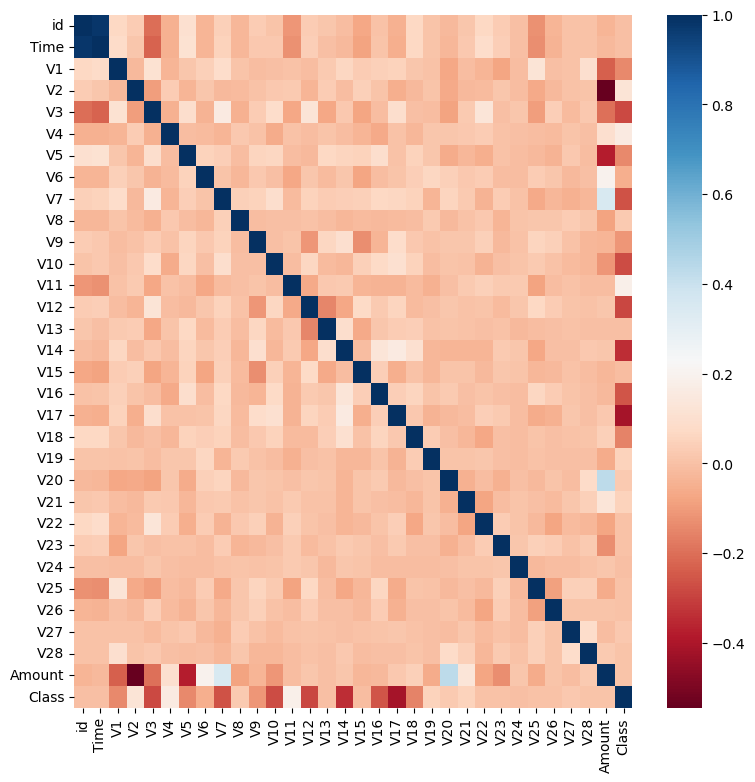

In [301]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

plt.show()

Class와의 음의 상관관계 최고치 : V14, V17 --> v14 제거 수행

In [303]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
# end of get_outlier

In [304]:
# 데이터 정제 후 다시 테스트 데이터 분리
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

# 하이퍼 파라미터 튜닝

In [306]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

param_grid_lgbm = {
    'num_leaves': [31, 64],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

lgbm_clf = LGBMClassifier(random_state=42)

grid_search_lgbm = RandomizedSearchCV(lgbm_clf, param_grid_lgbm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)

[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002090 -> initscore=-6.168489
[LightGBM] [Info] Start training from score -6.168489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [307]:
# Best parameters for LightGBM: {'num_leaves': 64, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}

In [308]:
train.shape

(170883, 32)

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

# 최적 파라미터로 재학습

In [311]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, ROC-AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [312]:
# 최적의 하이퍼파라미터
best_lgbm_clf = LGBMClassifier(num_leaves=31, learning_rate=0.01, n_estimators=200, max_depth=5, random_state=42)

best_lgbm_clf.fit(X_train, y_train)

y_pred_lgb = best_lgbm_clf.predict(X_test)
y_pred_proba_lgb = best_lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred_lgb, y_pred_proba_lgb)

[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002090 -> initscore=-6.168489
[LightGBM] [Info] Start training from score -6.168489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

# 결과 제출 파일 생성

In [314]:
best_lgbm_clf = LGBMClassifier(num_leaves=31, learning_rate=0.01, n_estimators=200, max_depth=5, random_state=42)

In [315]:
best_lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 250, number of negative: 119366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 119616, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002090 -> initscore=-6.168489
[LightGBM] [Info] Start training from score -6.168489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
               random_state=42)

In [316]:
y_pred_lgb = best_lgbm_clf.predict(X_test)

In [317]:
y_pred_lgb.shape

(51264,)

In [318]:
y_pred_proba_lgb = best_lgbm_clf.predict_proba(X_test)[:, 1]

In [319]:
y_pred_proba_lgb.shape

(51264,)

평가

In [321]:
get_clf_eval(y_test, y_pred_lgb, y_pred_proba_lgb)

오차 행렬
[[51149     8]
 [   18    89]]
정확도: 0.9995, 정밀도: 0.9175, 재현율: 0.8318,    F1: 0.8725, ROC-AUC:0.9819


In [322]:
####### 여기서부터 파일 생성한다 잘봐라 ############

In [323]:
# 'Amount_Scaled' 열을 train 데이터에서 계산한 방식대로 test 데이터에 추가
test['Amount_Scaled'] = np.log1p(test['Amount'])

In [324]:
test.shape

(113923, 32)

In [325]:
test

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_Scaled
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98,4.836123
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00,3.931826
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69,2.271094
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99,4.110710
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97,4.795543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113918,284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,1.305626
113919,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.570980
113920,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,3.249987
113921,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,4.232366


In [326]:
# 학습 데이터에서 사용한 열만 선택
train_columns = X_train.columns

In [327]:
train_columns

Index(['Amount_Scaled', 'id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [328]:
# test 데이터에서 train 데이터에 있는 피처만 선택
test_selected = test[train_columns]

In [377]:
# 테스트 데이터에 대해 확률 예측
y_pred_proba_test = best_lgbm_clf.predict_proba(test_selected)[:, 1]  # 두 번째 클래스의 확률값 추출

In [383]:
# 제출 파일 생성 (id 열과 예측값을 포함)
submission = pd.DataFrame({'id': test['id'], 'Class': y_pred_proba_test})

In [385]:
submission.to_csv('submission.csv', index=False)
